In [28]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# leo el fichero original Global_Supersstore2.csv
file_path = "Global_Superstore2.csv"
df_raw = pd.read_csv(file_path, encoding="latin1")

df_raw.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [29]:
# copio el df para no tocar el original
df = df_raw.copy()

# pongo los nombres de columnas en minúsculas y con guiones bajos
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [30]:
# convierto columnas de fecha
for col in ["order_date", "ship_date"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# columnas numéricas típicas del dataset
num_cols = ["sales", "quantity", "discount", "profit", "shipping_cost"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# limpio algunas columnas de texto/categorías
text_cols = [
    "ship_mode", "customer_id", "customer_name", "segment",
    "city", "state", "country", "postal_code",
    "market", "region",
    "product_id", "category", "sub_category", "product_name",
    "order_priority"
]

for col in text_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"\s+", " ", regex=True)
        )

# columna derivada: días que tarda en llegar el pedido
df["delivery_days"] = (df["ship_date"] - df["order_date"]).dt.days

df.head()


/var/folders/2h/b13q48ds53x71ywtcmdw_4j00000gn/T/ipykernel_19591/2157716457.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
/var/folders/2h/b13q48ds53x71ywtcmdw_4j00000gn/T/ipykernel_19591/2157716457.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,delivery_days
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,1


In [31]:
# =======================
# dim_product
# =======================
cols_product = ["product_id", "category", "sub_category", "product_name"]
dim_product = (
    df[cols_product]
      .drop_duplicates()
      .reset_index(drop=True)
)

dim_product["product_key"] = dim_product.index + 1
dim_product.head()


,product_id,category,sub_category,product_name,product_key
0,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,1
1,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",2
2,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",3
3,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",4
4,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",5


In [32]:
# =======================
# dim_customer
# =======================
cols_customer = [
    "customer_id", "customer_name", "segment",
    "country", "state", "city", "postal_code",
    "region", "market"
]

dim_customer = (
    df[cols_customer]
      .drop_duplicates()
      .reset_index(drop=True)
)

dim_customer["customer_key"] = dim_customer.index + 1
dim_customer.head()


,customer_id,customer_name,segment,country,state,city,postal_code,region,market,customer_key
0,RH-19495,Rick Hansen,Consumer,United States,New York,New York City,10024.0,East,US,1
1,JR-16210,Justin Ritter,Corporate,Australia,New South Wales,Wollongong,nan,Oceania,APAC,2
2,CR-12730,Craig Reiter,Consumer,Australia,Queensland,Brisbane,nan,Oceania,APAC,3
3,KM-16375,Katherine Murray,Home Office,Germany,Berlin,Berlin,nan,Central,EU,4
4,RH-9495,Rick Hansen,Consumer,Senegal,Dakar,Dakar,nan,Africa,Africa,5


In [33]:
# =======================
# dim_date (a partir de order_date)
# =======================
dim_date = (
    pd.DataFrame({"order_date": df["order_date"].dropna().drop_duplicates()})
      .sort_values("order_date")
      .reset_index(drop=True)
)

dim_date["date_key"] = dim_date.index + 1
dim_date["year"] = dim_date["order_date"].dt.year
dim_date["quarter"] = dim_date["order_date"].dt.quarter
dim_date["month"] = dim_date["order_date"].dt.month
dim_date["month_name"] = dim_date["order_date"].dt.month_name()
dim_date["day"] = dim_date["order_date"].dt.day
dim_date["weekday"] = dim_date["order_date"].dt.day_name()

dim_date.head()


,order_date,date_key,year,quarter,month,month_name,day,weekday
0,2011-01-01,1,2011,1,1,January,1,Saturday
1,2011-01-02,2,2011,1,1,January,2,Sunday
2,2011-01-03,3,2011,1,1,January,3,Monday
3,2011-01-04,4,2011,1,1,January,4,Tuesday
4,2011-01-05,5,2011,1,1,January,5,Wednesday


In [34]:
# empiezo de la tabla limpia de pedidos
fact_orders = df.copy()

# por si acaso no hay row_id en el csv, lo creo yo
if "row_id" not in fact_orders.columns:
    fact_orders["row_id"] = range(1, len(fact_orders) + 1)

# añado claves de las dimensiones

# product_key
fact_orders = fact_orders.merge(
    dim_product[["product_id", "product_key"]],
    on="product_id",
    how="left"
)

# customer_key
fact_orders = fact_orders.merge(
    dim_customer[["customer_id", "customer_key"]],
    on="customer_id",
    how="left"
)

# date_key
fact_orders = fact_orders.merge(
    dim_date[["order_date", "date_key"]],
    on="order_date",
    how="left"
)

# columnas finales que me interesa dejar en la fact
fact_cols = [
    "row_id",
    "order_id",
    "date_key",
    "customer_key",
    "product_key",
    "sales",
    "quantity",
    "discount",
    "profit",
    "shipping_cost",
    "delivery_days",
    "order_priority"
]

fact_orders = (
    fact_orders[fact_cols]
      .sort_values(["order_id"])
      .reset_index(drop=True)
)

fact_orders.head()


,row_id,order_id,date_key,customer_key,product_key,sales,quantity,discount,profit,shipping_cost,delivery_days,order_priority
0,48313,AE-2011-9160,264,1299,988,82.674,2,0.7,-157.086,5.69,4,Medium
1,48313,AE-2011-9160,264,12593,988,82.674,2,0.7,-157.086,5.69,4,Medium
2,48312,AE-2011-9160,264,22162,4996,78.408,6,0.7,-88.992,3.87,4,Medium
3,48312,AE-2011-9160,264,18223,4996,78.408,6,0.7,-88.992,3.87,4,Medium
4,48313,AE-2011-9160,264,22162,988,82.674,2,0.7,-157.086,5.69,4,Medium


In [35]:
import os

os.makedirs("data/warehouse", exist_ok=True)

dim_product.to_csv("data/warehouse/dim_product.csv", index=False)
dim_customer.to_csv("data/warehouse/dim_customer.csv", index=False)
dim_date.to_csv("data/warehouse/dim_date.csv", index=False)
fact_orders.to_csv("data/warehouse/fact_orders.csv", index=False)

os.listdir("data/warehouse")


['dim_product.csv', 'dim_customer.csv', 'dim_date.csv', 'fact_orders.csv']

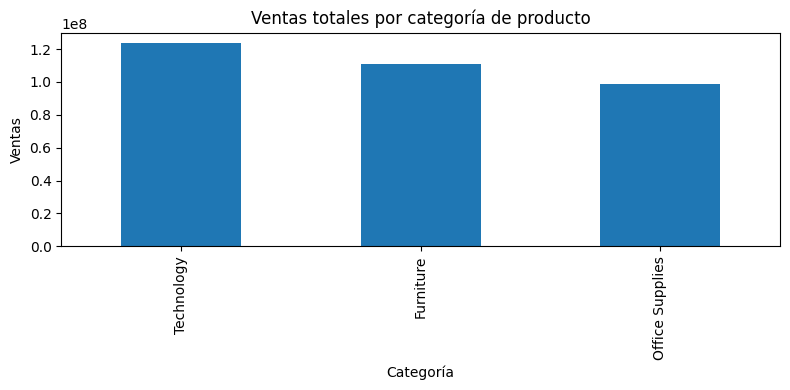

In [36]:
# junto fact_orders con dim_product para ver ventas por categoría
tmp = fact_orders.merge(
    dim_product[["product_key", "category"]],
    on="product_key",
    how="left"
)

ventas_categoria = (
    tmp.groupby("category")["sales"]
       .sum()
       .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
ventas_categoria.plot(kind="bar")
plt.title("Ventas totales por categoría de producto")
plt.ylabel("Ventas")
plt.xlabel("Categoría")
plt.tight_layout()
plt.show()


In [37]:
### Comentario de resultados que he tenido

En esta gráfica se ven las ventas totales por categoría de producto.

- La categoría **Technology** es la que más vende en el conjunto de datos.
- Después viene **Furniture**.
- La categoría con menos ventas totales es **Office Supplies**, aunque sigue teniendo un volumen bastante importante.

En un posible escenario real esto podría servir para:
- Entender en qué tipo de productos se concentra la facturación.
- Decidir dónde tiene sentido invertir más en marketing, stock, etc.

SyntaxError: invalid syntax (3093324150.py, line 3)